In [14]:
# Importing necessary libraries
from keras.preprocessing.image import ImageDataGenerator
# Building deep learning models
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as img

from PIL import Image

import os
import numpy as np

In [15]:
dataset = 'B:/AI and ML/tomato'

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


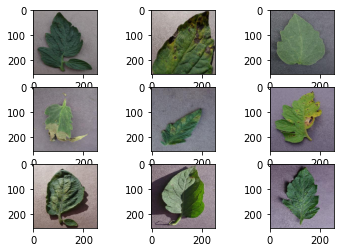

In [35]:
#using os to put the directory
import os
base_path='B:/AI and ML/tomato/train'
datas=os.listdir("B:/AI and ML/tomato/train")
print(datas) #listing files in the directry

for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = base_path + '/' + datas[i]
    # copying the file path
    f2 = filename + '/' + os.listdir(filename)[0]
    # load image pixelsTomato___Bacterial_spot
    image = imread(f2)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()


In [17]:
#Displaying specific folder inside train
os.listdir(base_path)[0]

'Tomato___Bacterial_spot'

In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
        'B:/AI and ML/tomato/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 10000 images belonging to 10 classes.


In [21]:
test_generator = test_datagen.flow_from_directory(
        'B:/AI and ML/tomato/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [59]:
#Adam optimizer 
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [36]:
# First model

cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()

# Fit
temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

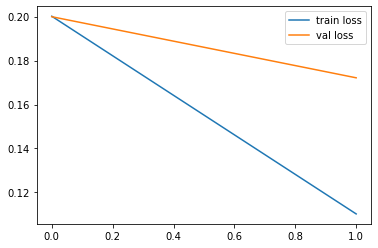

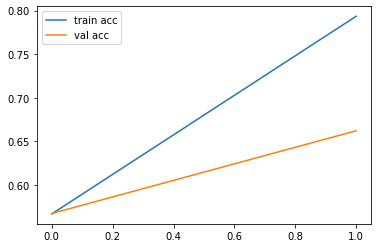

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# Testing the model
from keras.preprocessing import image
test = image.load_img("B:/AI and ML/tomato/train/Tomato___Bacterial_spot/33028adc-9dc2-4ac3-a7b9-7094200264f6___GCREC_Bact.Sp 3162.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)

In [40]:
result

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [47]:
validationDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
validation_generator = validationDataGenerator.flow_from_directory(
        'B:/AI and ML/tomato/val',
        target_size=(150,150),
        batch_size=32,
        class_mode="sparse",
)

# train_generator = train_datagen.flow_from_directory(
#         'B:/AI and ML/tomato/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='categorical')

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)


Found 1000 images belonging to 10 classes.


In [48]:
predictions=cnn.predict(validation_generator)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.09      0.07      0.08       100
           1       0.10      0.03      0.05       100
           2       0.10      0.13      0.11       100
           3       0.09      0.09      0.09       100
           4       0.13      0.27      0.18       100
           5       0.05      0.03      0.04       100
           6       0.09      0.09      0.09       100
           7       0.12      0.10      0.11       100
           8       0.10      0.12      0.11       100
           9       0.09      0.08      0.08       100

    accuracy                           0.10      1000
   macro avg       0.10      0.10      0.09      1000
weighted avg       0.10      0.10      0.09      1000



<AxesSubplot:>

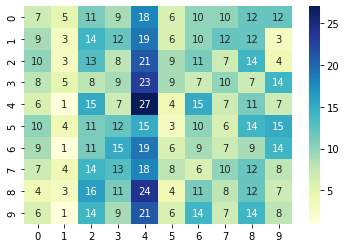

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [27]:

# Second model

cnn2 = tf.keras.models.Sequential()

#Convolution layer 1
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn2.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn2.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn2.summary()

# Fit
temp = cnn2.fit(x = train_generator, validation_data=test_generator,epochs=25)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

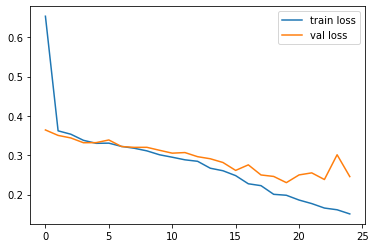

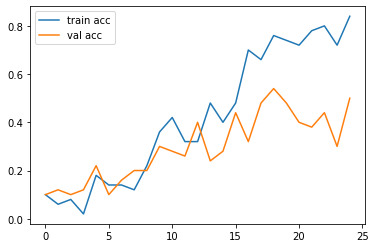

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# Third model

cnn3 = tf.keras.models.Sequential()

#Convolution layer 1
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn3.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn3.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn3.summary()

# Fit
temp = cnn3.fit(x = train_generator, validation_data=test_generator,epochs=25,batch_size = 64)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_7 (Dense)             (None, 128)              

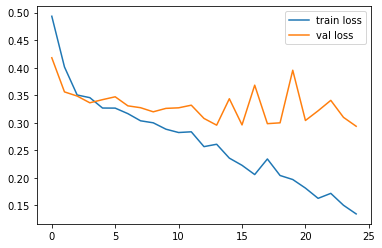

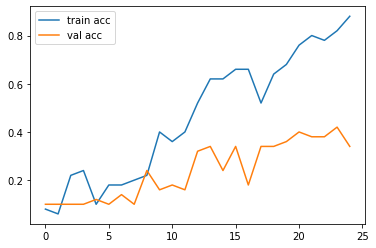

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
val = cnn.evaluate(test_generator,steps=200)

200/200 [==============================] - 0s 849us/step - loss: 0.2916 - accuracy: 0.4400


In [32]:
val2=cnn2.evaluate(test_generator,steps=200)

200/200 [==============================] - 0s 452us/step - loss: 0.2457 - accuracy: 0.5000


In [33]:
val3=cnn3.evaluate(test_generator,steps=200)

200/200 [==============================] - 0s 492us/step - loss: 0.2457 - accuracy: 0.5000


In [ ]:
#Therefore it can be seen that the accuracy increases after first model and remains the same for second and third model.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


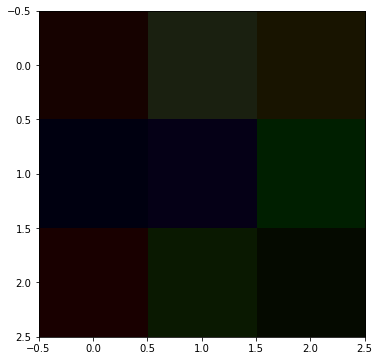

In [59]:
top_layer = cnn.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


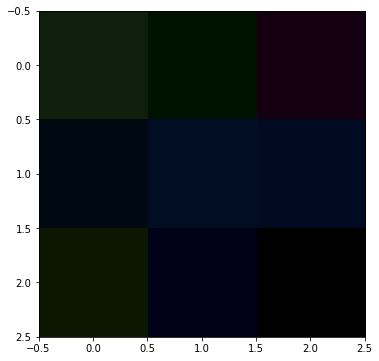

In [57]:
top_layer = cnn2.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


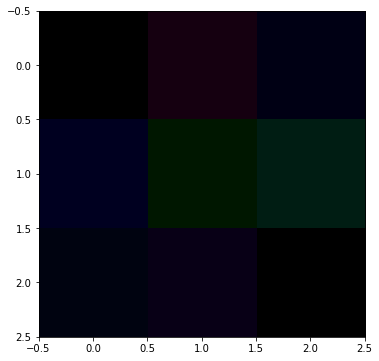

In [53]:
top_layer = cnn3.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap=None)